In [20]:
library(DESeq2)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(GenomicRanges)

In [6]:
dds <- readRDS("/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/PEAKS/COLvsDM.all.DESeq.object.rds")

In [7]:
dds

class: DESeqDataSet 
dim: 57529 12 
metadata(1): version
assays(5): counts normalizationFactors mu H cooks
rownames(57529): chr1:2421-3247 chr1:4323-5335 ...
  chr5:26974306-26974602 chr5:26975237-26975460
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(12): C12_1 C12_2 ... DM6-DM7_2 DM6-DM7_3
colData names(8): SampleID Condition ... conditionSummary name

In [9]:
# Extract count table
count_table <- counts(dds, normalized=FALSE)  # Set normalized=FALSE for raw counts

In [10]:
sample_info <- colData(dds) %>% as.data.frame() %>% mutate(group = SampleID %>% str_remove_all("_\\d$"))

In [11]:
sample_info_DM1_DM2d <- sample_info %>% filter(group %in% c("C12", "DM1-DM2d"))

In [12]:
sample_info_DM6_DM7 <- sample_info %>% filter(group %in% c("C14", "DM6-DM7"))
sample_info_DM6_DM7

,SampleID,Condition,Replicate,bamReads,Peaks,PeakCaller,conditionSummary,name,group
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>
C14_1,C14_1,COL,1,data/4_intersect_bam_modified/C1_L3_clean_filtered.bam,data/5_macs2peaks_modified/C1_L3_clean_filtered_peaks.narrowPeak,narrow,COL,C1_L3_clean_filtered,C14
C14_2,C14_2,COL,2,data/4_intersect_bam_modified/C2_L3_clean_filtered.bam,data/5_macs2peaks_modified/C2_L3_clean_filtered_peaks.narrowPeak,narrow,COL,C2_L3_clean_filtered,C14
C14_3,C14_3,COL,3,data/4_intersect_bam_modified/C3_L3_clean_filtered.bam,data/5_macs2peaks_modified/C3_L3_clean_filtered_peaks.narrowPeak,narrow,COL,C3_L3_clean_filtered,C14
DM6-DM7_1,DM6-DM7_1,DM,1,data/4_intersect_bam_modified/OK1_L3_clean_filtered.bam,data/5_macs2peaks_modified/OK1_L3_clean_filtered_peaks.narrowPeak,narrow,DM,OK1_L3_clean_filtered,DM6-DM7
DM6-DM7_2,DM6-DM7_2,DM,2,data/4_intersect_bam_modified/OK2_L3_clean_filtered.bam,data/5_macs2peaks_modified/OK2_L3_clean_filtered_peaks.narrowPeak,narrow,DM,OK2_L3_clean_filtered,DM6-DM7
DM6-DM7_3,DM6-DM7_3,DM,3,data/4_intersect_bam_modified/OK3_L3_clean_filtered.bam,data/5_macs2peaks_modified/OK3_L3_clean_filtered_peaks.narrowPeak,narrow,DM,OK3_L3_clean_filtered,DM6-DM7


In [13]:
## construct dds

# put the variable of interest at the end of formula so res function will take condition by default
dds <- DESeqDataSetFromMatrix(count_table, colData=sample_info, design= ~  group) 
dds <- dds[ rowSums(counts(dds)) > 5, ]

dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

In [14]:
dds

class: DESeqDataSet 
dim: 57529 12 
metadata(1): version
assays(4): counts mu H cooks
rownames(57529): chr1:2421-3247 chr1:4323-5335 ...
  chr5:26974306-26974602 chr5:26975237-26975460
rowData names(30): baseMean baseVar ... deviance maxCooks
colnames(12): C12_1 C12_2 ... DM6-DM7_2 DM6-DM7_3
colData names(10): SampleID Condition ... group sizeFactor

In [15]:
res_DM6_DM7 <- results(dds, contrast=c("group", "DM6-DM7", "C14"))
res_DM6_DM7

log2 fold change (MLE): group DM6-DM7 vs C14 
Wald test p-value: group DM6-DM7 vs C14 
DataFrame with 57529 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat      pvalue
                       <numeric>      <numeric> <numeric> <numeric>   <numeric>
chr1:2421-3247           433.443     -0.2299000 0.0983024 -2.338702 0.019350876
chr1:4323-5335           492.703     -0.0634003 0.0864985 -0.732964 0.463580432
chr1:6307-6951           390.680     -0.2197204 0.0901895 -2.436209 0.014842118
chr1:8408-8984           431.284     -0.4501149 0.1217885 -3.695873 0.000219133
chr1:9770-10841          528.175     -0.2987393 0.1096323 -2.724919 0.006431726
...                          ...            ...       ...       ...         ...
chr5:26971150-26971331   124.522      0.1481604 0.1792811  0.826414 4.08569e-01
chr5:26971500-26971814   200.911      0.1654027 0.1216502  1.359659 1.73938e-01
chr5:26972052-26972799   845.457     -0.4784567 0.0757794 -6.313812 2.722

In [16]:
res_DM1_DM2d <- results(dds, contrast=c("group", "DM1-DM2d", "C12"))

In [17]:
# Estimate Dispersion Trend?
vsd <- vst(dds)
assay_vsd <- vsd %>% assay()
z_assay <- ( assay_vsd - mean(assay_vsd) ) / sd(assay_vsd)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



In [202]:
mean_z <- z_assay %>% as.data.frame() %>% tibble::rownames_to_column("peakID") %>% 
    pivot_longer(cols = -peakID , names_to = "sample", values_to = "z_score") %>% 
    mutate(group = sample %>% str_remove_all("_\\d$")) %>% 
    group_by(group, peakID) %>% 
    summarise(mean_z = mean(z_score)) %>% ungroup()

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


In [203]:
mean_z 

group,peakID,mean_z
<chr>,<chr>,<dbl>
C12,chr1:10000372-10002046,2.5177286
C12,chr1:10007630-10007834,-1.4411627
C12,chr1:10009893-10010467,-0.8806062
C12,chr1:10011279-10011738,-0.6177905
C12,chr1:10012662-10013241,-0.3816548
C12,chr1:10013703-10014618,0.4827104
C12,chr1:10015752-10015953,-0.9191866
C12,chr1:10016910-10017661,0.2213798
C12,chr1:10017843-10019118,1.0734452


In [18]:
connectivity_table_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [205]:
allMotifs <- read.csv('/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.allMotifs.tsv', sep = '\t') 

In [206]:
allMotifs %>% filter(TF == "AT1G01060", TFBSID == 'chr1:10033654-10033864' )

permutation,TF,chr,MSS,MES,TFBSID,strand,peakID,l2FC,limma_avgExpr,limma_B,limma_t_stat,DESeq_ldcSE,DESeq_stat,DESeq_baseMean,pval,pval_adj
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10033654,10033864,chr1:10033654-10033864,-,chr1:10033450-10034376,0.0562,7.5,-6.75,0.499,NA,NA,NA,0.624,0.708


In [207]:
allMotifs  %>% nrow

[1] 4977911

In [208]:
allMotifs %>% filter(l2FC > 2) %>% nrow

[1] 0

In [209]:
allMotifs %>% filter(l2FC < -2) %>% nrow

[1] 370

condition specified first is the reference condition.

##### l2FC here is the motif opening, DM vs WT

In [19]:
library(ChIPseeker)
library(TxDb.Athaliana.BioMart.plantsmart51)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  inner_join.phylo    tidytree
  inner_join.treedata tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

ChIPseeker v1.36.0

If you use ChIPseeker in publis

In [211]:
library(dplyr)
library(GenomicRanges)

# Assuming your data frame is named allMotifs
# Extract and transform the necessary columns
allMotifs_transformed <- allMotifs %>%
  mutate(
    chr = gsub("chr", "", chr), # Remove 'chr' from chromosome column
    start = as.numeric(gsub(".*:(\\d+)-\\d+", "\\1", peakID)), # Extract start position
    end = as.numeric(gsub(".*:\\d+-(\\d+)", "\\1", peakID)) # Extract end position
  )

# Create a GRanges object
granges_obj <- GRanges(
  seqnames = Rle(allMotifs_transformed$chr),
  ranges = IRanges(start = allMotifs_transformed$start, end = allMotifs_transformed$end),
  strand = Rle(strand(allMotifs_transformed$strand))    
)

# Add TF as metadata
mcols(granges_obj)$TF <- allMotifs_transformed$TF
mcols(granges_obj)$peakID <- allMotifs_transformed$peakID

granges_obj

GRanges object with 4977911 ranges and 2 metadata columns:
            seqnames            ranges strand |          TF
               <Rle>         <IRanges>  <Rle> | <character>
        [1]        1 10020021-10020531      - |   AT1G01060
        [2]        1 10025659-10026539      - |   AT1G01060
        [3]        1 10033450-10034376      - |   AT1G01060
        [4]        1 10050202-10050394      - |   AT1G01060
        [5]        1 10052827-10054516      - |   AT1G01060
        ...      ...               ...    ... .         ...
  [4977907]        5   9940599-9941159      + |   AT5G67580
  [4977908]        5     996550-997478      - |   AT5G67580
  [4977909]        5   9968914-9969679      + |   AT5G67580
  [4977910]        5   9974520-9975810      - |   AT5G67580
  [4977911]        5     997676-998485      - |   AT5G67580
                            peakID
                       <character>
        [1] chr1:10020021-10020531
        [2] chr1:10025659-10026539
        [3] chr1:1003

In [212]:
# Annotate peaks
txdb <- TxDb.Athaliana.BioMart.plantsmart51
annotated_peaks <- annotatePeak(granges_obj, TxDb = txdb, level = "gene")

>> preparing features information...		 2023-11-27 16:31:25 
>> identifying nearest features...		 2023-11-27 16:31:25 
>> calculating distance from peak to TSS...	 2023-11-27 16:32:22 
>> assigning genomic annotation...		 2023-11-27 16:32:22 
>> assigning chromosome lengths			 2023-11-27 16:32:39 
>> done...					 2023-11-27 16:32:39 


In [213]:
TF_peak_annotated <- as_tibble(annotated_peaks@anno) %>% filter( distanceToTSS %>% abs() < 20000 )
TF_peak_annotated

seqnames,start,end,width,strand,TF,peakID,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,10020021,10020531,511,-,AT1G01060,chr1:10020021-10020531,Promoter (1-2kb),1,10018691,10020479,1789,1,AT1G28500,1840
1,10025659,10026539,881,-,AT1G01060,chr1:10025659-10026539,Promoter (2-3kb),1,10023817,10026311,2495,1,AT1G28510,2722
1,10033450,10034376,927,-,AT1G01060,chr1:10033450-10034376,Promoter (2-3kb),1,10035617,10037403,1787,1,AT1G28540,-2167
1,10050202,10050394,193,-,AT1G01060,chr1:10050202-10050394,Promoter (1-2kb),1,10047276,10049343,2068,2,AT1G28590,-1051
1,10052827,10054516,1690,-,AT1G01060,chr1:10052827-10054516,Promoter (<=1kb),1,10050957,10053218,2262,2,AT1G28600,0
1,10055379,10055976,598,-,AT1G01060,chr1:10055379-10055976,Promoter (<=1kb),1,10053443,10055881,2439,2,AT1G28610,0
1,1006358,1006626,269,-,AT1G01060,chr1:1006358-1006626,Promoter (1-2kb),1,1004688,1008370,3683,1,AT1G03930,1938
1,10074221,10075193,973,-,AT1G01060,chr1:10074221-10075193,Promoter (1-2kb),1,10071609,10073549,1941,2,AT1G28660,-1644
1,10110573,10111709,1137,-,AT1G01060,chr1:10110573-10111709,Promoter (1-2kb),1,10109500,10111738,2239,2,AT1G28960,1165


In [214]:
mean_z

group,peakID,mean_z
<chr>,<chr>,<dbl>
C12,chr1:10000372-10002046,2.5177286
C12,chr1:10007630-10007834,-1.4411627
C12,chr1:10009893-10010467,-0.8806062
C12,chr1:10011279-10011738,-0.6177905
C12,chr1:10012662-10013241,-0.3816548
C12,chr1:10013703-10014618,0.4827104
C12,chr1:10015752-10015953,-0.9191866
C12,chr1:10016910-10017661,0.2213798
C12,chr1:10017843-10019118,1.0734452


In [215]:
mean_z_peaks <- mean_z %>% 
    left_join(TF_peak_annotated %>% dplyr::select(peakID, annotation, geneId, distanceToTSS) %>% distinct() , by = 'peakID') 

Warning message in left_join(., TF_peak_annotated %>% dplyr::select(peakID, annotation, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 49787 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [216]:
mean_z_peaks_slice1 <- mean_z_peaks %>%group_by(group,peakID, mean_z, geneId) %>% arrange(abs(distanceToTSS)) %>% slice(1)

In [217]:
mean_z_peaks_slice1_module <- mean_z_peaks_slice1 %>% distinct() %>% left_join(connectivity_table_info, by = c('geneId' = 'gene')) %>%
    filter(!is.na(module))

In [218]:
mean_z_peaks_slice1_module 

group,peakID,mean_z,annotation,geneId,distanceToTSS,connectivity_rowSums_adj,module,gene_name,DM6/DM7,⋯,DM10/DM11,AvrRpt2-6h,AvrRpt2-12h,AvrRpt2-20h,AvrRps4-6h,AvrRps4-12h,AvrRps4-20h,DM1/DM2d_adr1s,Col-0_adr1s,DM6/DM7_adr1s
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C12,chr1:10013703-10014618,0.4827104244,Promoter (<=1kb),AT1G28480,0,1856.52132,MEcyan,GRX480,1.5077065,⋯,8.1505661,1.31284481,2.86469287,4.5461750,1.119636103,2.9178007,4.4581918,5.35409184,1.86393880,1.33694491
C12,chr1:10027242-10027464,-1.2273386703,Promoter (1-2kb),AT1G28520,-1619,1867.35521,MEcyan,VOZ1,1.0638736,⋯,2.3072754,0.06378129,0.43262907,1.2177253,0.040559480,0.4185788,1.0295088,0.70280329,-0.06002487,0.29386865
C12,chr1:10030349-10031912,1.7615882615,Promoter (1-2kb),AT1G28520,1266,1867.35521,MEcyan,VOZ1,1.0638736,⋯,2.3072754,0.06378129,0.43262907,1.2177253,0.040559480,0.4185788,1.0295088,0.70280329,-0.06002487,0.29386865
C12,chr1:10046303-10047106,1.4185962898,Promoter (<=1kb),AT1G28580,0,1508.30601,MEcyan,AXE1,2.3920347,⋯,0.9218687,-0.24551779,0.33198266,1.0861413,-0.123371581,0.5519327,1.2694733,1.03444754,-1.10107325,0.67119351
C12,chr1:10047315-10048067,0.2660600464,Promoter (<=1kb),AT1G28580,-763,1508.30601,MEcyan,AXE1,2.3920347,⋯,0.9218687,-0.24551779,0.33198266,1.0861413,-0.123371581,0.5519327,1.2694733,1.03444754,-1.10107325,0.67119351
C12,chr1:10055379-10055976,0.1940333388,Promoter (<=1kb),AT1G28610,0,1320.38471,MEblue,GGL3,-0.4615806,⋯,-1.6309959,-0.60615567,-0.91719186,-1.4620011,-0.453321664,-0.5501324,-1.0619541,0.10620949,1.62644283,-0.31269908
C12,chr1:10056303-10056905,0.4897429255,Promoter (<=1kb),AT1G28610,-422,1320.38471,MEblue,GGL3,-0.4615806,⋯,-1.6309959,-0.60615567,-0.91719186,-1.4620011,-0.453321664,-0.5501324,-1.0619541,0.10620949,1.62644283,-0.31269908
C12,chr1:10057735-10058223,-0.0002745334,Promoter (1-2kb),AT1G28610,-1854,1320.38471,MEblue,GGL3,-0.4615806,⋯,-1.6309959,-0.60615567,-0.91719186,-1.4620011,-0.453321664,-0.5501324,-1.0619541,0.10620949,1.62644283,-0.31269908
C12,chr1:10076319-10076938,0.4638022409,Promoter (<=1kb),AT1G28670,0,166.20128,MEpurple,ARAB-1,0.2729507,⋯,-2.6150591,-1.02310328,-0.78550731,-2.0553763,-0.415050743,-0.6552764,-1.5738090,-0.28765293,1.23115473,0.29180902


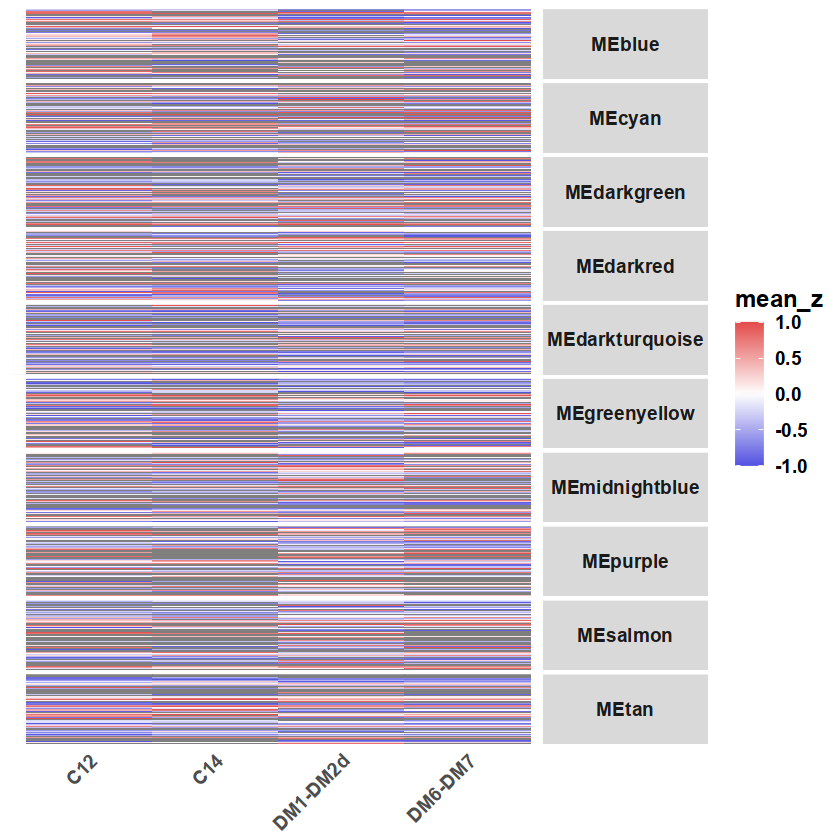

In [219]:
mean_z_peaks_slice1_module  %>% ggplot(aes(x = group, y = peakID, fill = mean_z)) + 
    geom_tile() + 
 scale_fill_gradientn(
        colors = colorRampPalette(rev(c( '#e34c4b', 'white', '#5453e0' )))(30),
        limits = c(-1, 1)) +
    facet_grid(module ~ ., scales = 'free')+
    theme(
        text = element_text(face="bold", size=14,  family = 'Helvetica'),
        axis.text.y = element_blank(),
        axis.line  = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
         strip.text.y = element_text(angle = 0),  # Make facet labels horizontal
        panel.spacing = unit(0.2, "lines") ## spacing between facets
    ) 

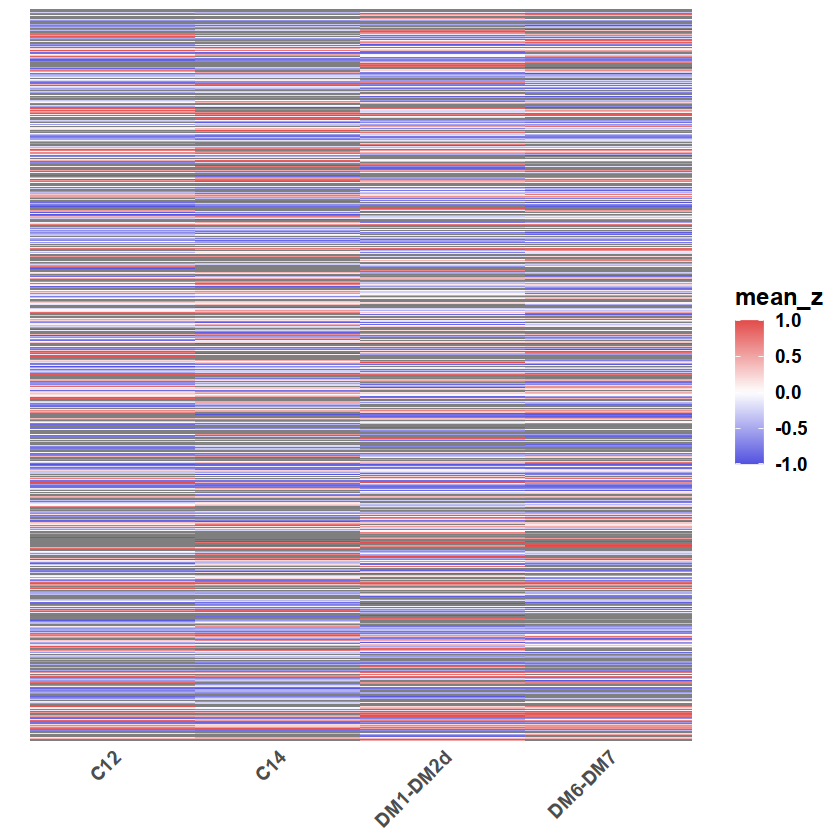

In [220]:
mean_z_peaks_slice1_module  %>% ggplot(aes(x = group, y = peakID, fill = mean_z)) + 
    geom_tile() + 
 scale_fill_gradientn(
        colors = colorRampPalette(rev(c( '#e34c4b', 'white', '#5453e0' )))(30),
        limits = c(-1, 1)) +
    # facet_grid(module ~ ., scales = 'free')+
    theme(
        text = element_text(face="bold", size=14,  family = 'Helvetica'),
        axis.text.y = element_blank(),
        axis.line  = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
         strip.text.y = element_text(angle = 0),  # Make facet labels horizontal
        panel.spacing = unit(0.2, "lines") ## spacing between facets
    ) 

In [37]:
res_combind <- res_DM6_DM7 %>% as.data.frame %>% tibble::rownames_to_column("peakID")  %>% mutate(source = "DM6-DM7") %>% 
    rbind(res_DM1_DM2d %>% as.data.frame %>% tibble::rownames_to_column("peakID") %>% mutate(source = "DM1-DM2d")) 

In [39]:
res_combind <- res_combind %>% mutate(chr = peakID %>% str_extract("chr(\\d+)") %>% str_remove('chr'), 
                      start = peakID %>% str_extract(":(\\d+)-") %>% str_extract("(\\d+)") %>% as.numeric(),
                    end = peakID %>% str_extract("-(\\d+)$") %>% str_extract("(\\d+)") %>% as.numeric()
                      )
res_combind

peakID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,source,chr,start,end
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr1:2421-3247,433.4427,-0.22989999,0.09830240,-2.3387017,1.935088e-02,4.814621e-02,DM6-DM7,1,2421,3247
chr1:4323-5335,492.7033,-0.06340028,0.08649850,-0.7329639,4.635804e-01,5.935881e-01,DM6-DM7,1,4323,5335
chr1:6307-6951,390.6798,-0.21972040,0.09018948,-2.4362087,1.484212e-02,3.869135e-02,DM6-DM7,1,6307,6951
chr1:8408-8984,431.2840,-0.45011489,0.12178852,-3.6958729,2.191326e-04,9.947510e-04,DM6-DM7,1,8408,8984
chr1:9770-10841,528.1748,-0.29873926,0.10963234,-2.7249190,6.431726e-03,1.918007e-02,DM6-DM7,1,9770,10841
chr1:12449-12759,185.5376,0.02823844,0.13326028,0.2119044,8.321816e-01,8.885748e-01,DM6-DM7,1,12449,12759
chr1:13550-14348,524.6332,-0.77378899,0.09157188,-8.4500725,2.911220e-17,9.425189e-16,DM6-DM7,1,13550,14348
chr1:16461-16929,631.7848,-1.01866561,0.08692267,-11.7192171,1.016067e-31,1.506529e-29,DM6-DM7,1,16461,16929
chr1:18996-19238,173.9006,-0.07037763,0.13274876,-0.5301566,5.960033e-01,7.103316e-01,DM6-DM7,1,18996,19238


In [40]:
res_combind %>% mutate(diff = end - start) %>% sample_n(1000)

peakID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,source,chr,start,end,diff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr3:2424291-2424649,242.8048,-0.03370072,0.10067184,-0.3347582,7.378075e-01,8.117449e-01,DM1-DM2d,3,2424291,2424649,358
chr2:18439603-18440883,827.4209,-0.14869674,0.07099478,-2.0944743,3.621775e-02,7.404040e-02,DM1-DM2d,2,18439603,18440883,1280
chr1:28890116-28890942,480.1499,-0.30806508,0.10108994,-3.0474357,2.308029e-03,7.956532e-03,DM6-DM7,1,28890116,28890942,826
chr5:7992687-7993271,319.5550,0.05766727,0.10289888,0.5604266,5.751885e-01,6.925575e-01,DM6-DM7,5,7992687,7993271,584
chr2:13638084-13638404,253.4660,-0.13553133,0.09833728,-1.3782293,1.681325e-01,2.617938e-01,DM1-DM2d,2,13638084,13638404,320
chr2:2490747-2492027,575.9970,0.29701073,0.09401714,3.1591125,1.582504e-03,4.784019e-03,DM1-DM2d,2,2490747,2492027,1280
chr1:27834572-27835784,722.5872,0.43216397,0.07687687,5.6215083,1.892974e-08,1.336535e-07,DM1-DM2d,1,27834572,27835784,1212
chr4:5158482-5158974,238.4541,0.10377781,0.09884853,1.0498670,2.937792e-01,4.070821e-01,DM1-DM2d,4,5158482,5158974,492
chr4:15077386-15077749,189.1423,0.22122838,0.11082459,1.9962030,4.591183e-02,9.037369e-02,DM1-DM2d,4,15077386,15077749,363


In [41]:
# Create a GRanges object
res_granges <- GRanges(
  seqnames = Rle(res_combind$chr),
  ranges = IRanges(start = res_combind$start, end = res_combind$end),
  strand = '+'
)
mcols(res_granges)$source <- res_combind$source
mcols(res_granges)$peakID <- res_combind$peakID
mcols(res_granges)$log2FoldChange <- res_combind$log2FoldChange

In [42]:
res_granges

GRanges object with 115058 ranges and 3 metadata columns:
           seqnames            ranges strand |      source
              <Rle>         <IRanges>  <Rle> | <character>
       [1]        1         2421-3247      + |     DM6-DM7
       [2]        1         4323-5335      + |     DM6-DM7
       [3]        1         6307-6951      + |     DM6-DM7
       [4]        1         8408-8984      + |     DM6-DM7
       [5]        1        9770-10841      + |     DM6-DM7
       ...      ...               ...    ... .         ...
  [115054]        5 26971150-26971331      + |    DM1-DM2d
  [115055]        5 26971500-26971814      + |    DM1-DM2d
  [115056]        5 26972052-26972799      + |    DM1-DM2d
  [115057]        5 26974306-26974602      + |    DM1-DM2d
  [115058]        5 26975237-26975460      + |    DM1-DM2d
                           peakID log2FoldChange
                      <character>      <numeric>
       [1]         chr1:2421-3247     -0.2299000
       [2]         chr1:4323

In [43]:
# Annotate peaks
txdb <- TxDb.Athaliana.BioMart.plantsmart51
annotated_peaks_res <- annotatePeak(res_granges, TxDb = txdb, level = "gene")

>> preparing features information...		 2023-11-27 17:30:05 
>> identifying nearest features...		 2023-11-27 17:30:05 
>> calculating distance from peak to TSS...	 2023-11-27 17:30:06 
>> assigning genomic annotation...		 2023-11-27 17:30:06 
>> assigning chromosome lengths			 2023-11-27 17:30:20 
>> done...					 2023-11-27 17:30:20 


In [44]:
annotated_peaks_res@anno

GRanges object with 115058 ranges and 11 metadata columns:
           seqnames            ranges strand |      source
              <Rle>         <IRanges>  <Rle> | <character>
       [1]        1         2421-3247      + |     DM6-DM7
       [2]        1         4323-5335      + |     DM6-DM7
       [3]        1         6307-6951      + |     DM6-DM7
       [4]        1         8408-8984      + |     DM6-DM7
       [5]        1        9770-10841      + |     DM6-DM7
       ...      ...               ...    ... .         ...
  [115054]        5 26971150-26971331      + |    DM1-DM2d
  [115055]        5 26971500-26971814      + |    DM1-DM2d
  [115056]        5 26972052-26972799      + |    DM1-DM2d
  [115057]        5 26974306-26974602      + |    DM1-DM2d
  [115058]        5 26975237-26975460      + |    DM1-DM2d
                           peakID log2FoldChange       annotation   geneChr
                      <character>      <numeric>      <character> <integer>
       [1]         chr

In [50]:
res_peaks_WGCNA <- annotated_peaks_res@anno %>% as_tibble %>% left_join(connectivity_table_info %>% dplyr::select(gene, connectivity_rowSums_adj,module), by = c('geneId' = 'gene')) %>% filter(module != "NA")

In [51]:
res_peaks_WGCNA

seqnames,start,end,width,strand,source,peakID,log2FoldChange,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS,connectivity_rowSums_adj,module
<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,2421,3247,827,+,DM6-DM7,chr1:2421-3247,-0.22989999,Promoter (<=1kb),1,3631,5899,2269,1,AT1G01010,-384,1768.66597,MEcyan
1,4323,5335,1013,+,DM6-DM7,chr1:4323-5335,-0.06340028,Promoter (<=1kb),1,3631,5899,2269,1,AT1G01010,692,1768.66597,MEcyan
1,37804,38663,860,+,DM6-DM7,chr1:37804-38663,-0.56016850,Promoter (<=1kb),1,33365,37871,4507,2,AT1G01060,0,169.43304,MEpurple
1,38936,39222,287,+,DM6-DM7,chr1:38936-39222,-0.25083232,Promoter (1-2kb),1,33365,37871,4507,2,AT1G01060,-1065,169.43304,MEpurple
1,39485,39745,261,+,DM6-DM7,chr1:39485-39745,-0.24751924,Promoter (1-2kb),1,38444,41017,2574,2,AT1G01070,1272,43.88574,MEsalmon
1,40748,41131,384,+,DM6-DM7,chr1:40748-41131,0.09879494,Promoter (<=1kb),1,38444,41017,2574,2,AT1G01070,0,43.88574,MEsalmon
1,56570,58148,1579,+,DM6-DM7,chr1:56570-58148,-0.38918634,Promoter (1-2kb),1,57164,59215,2052,2,AT1G01120,1067,1688.73750,MEblue
1,59703,60099,397,+,DM6-DM7,chr1:59703-60099,-0.89430975,Promoter (<=1kb),1,57164,59215,2052,2,AT1G01120,-488,1688.73750,MEblue
1,60661,60890,230,+,DM6-DM7,chr1:60661-60890,-0.72736954,Promoter (1-2kb),1,57164,59215,2052,2,AT1G01120,-1446,1688.73750,MEblue


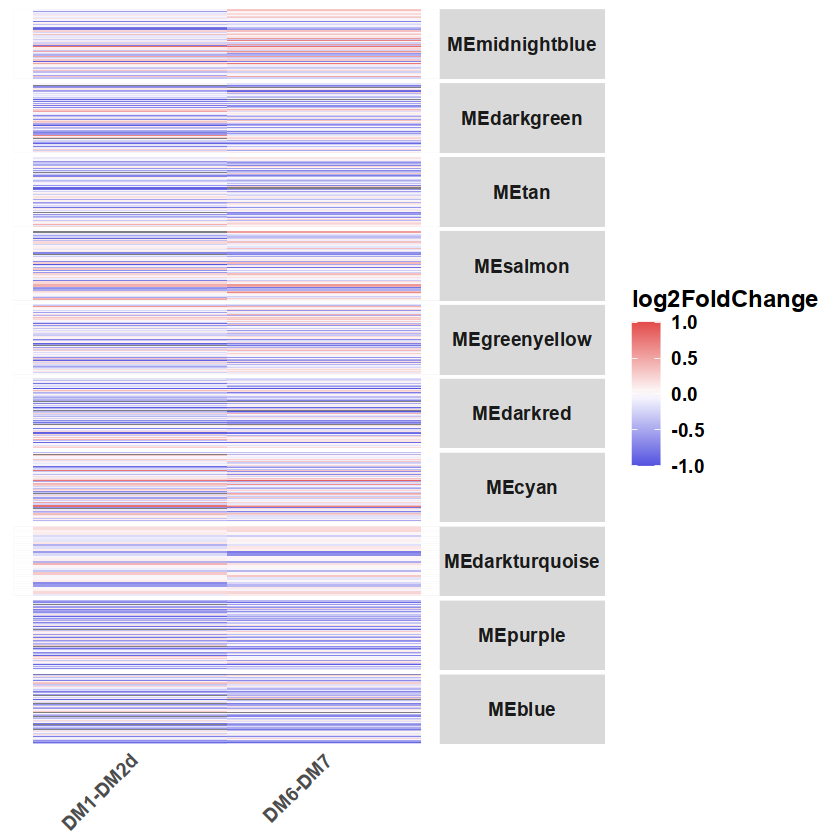

In [58]:
# Reorder the modules
facet_order <- c('MEmidnightblue', 'MEdarkgreen', 'MEtan', 'MEsalmon', 'MEgreenyellow', 
                 'MEdarkred', 'MEcyan', 'MEdarkturquoise', 'MEpurple', 'MEblue')
res_peaks_WGCNA$module <- factor(res_peaks_WGCNA$module, levels = facet_order)

res_peaks_WGCNA %>%  ggplot(aes(x = source, y = geneId, fill = log2FoldChange)) + 
    geom_tile() + 
 scale_fill_gradientn(
        colors = colorRampPalette(rev(c( '#e34c4b', 'white', '#5453e0' )))(20),
        limits = c(-1, 1)) +
    facet_grid(module ~ ., scales = 'free')+
    theme(
        text = element_text(face="bold", size=14,  family = 'Helvetica'),
        axis.text.y = element_blank(),
        axis.line  = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
         strip.text.y = element_text(angle = 0),  # Make facet labels horizontal
        panel.spacing = unit(0.2, "lines") ## spacing between facets
    ) 